# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("/Users/yudi/Desktop/DS-SF-31-sophiesworld/Projects/Project_2/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [6]:
df_raw.describe()

/Users/yudi/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [24]:
df_raw.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

## Questions
#### Question 1. How many observations are in our dataset? 


In [21]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations. Gre has 2 null values, gpa 2 null values, and prestige 1 null value.

#### Question 2. Create a summary table

In [29]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [33]:
print df_raw.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64


In [35]:
print pd.crosstab(df_raw['admit'], df_raw['prestige'], rownames = ['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   97   93   55
1          33   53   28   12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11639a790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1165e32d0>]], dtype=object)

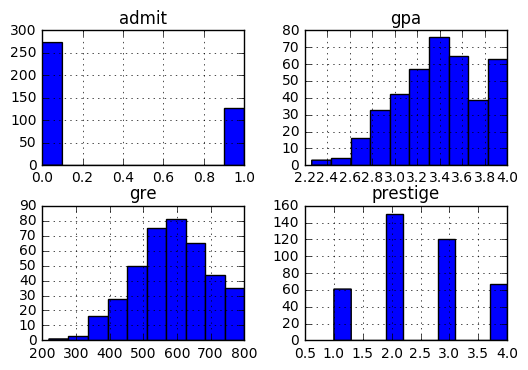

In [38]:
df_raw.hist()
pl.show()

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because GRE score has a range from 220 to 800; whereas GPA has a range from 2.26 to 4.00. GRE score and GPA have different scales.

#### Question 4. Drop data points with missing data


In [46]:
df = df_raw.dropna()
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: There are 397 rows, with 3 rows containing null values dropped, compared to 400 rows.

#### Question 6. Create box plots for GRE and GPA

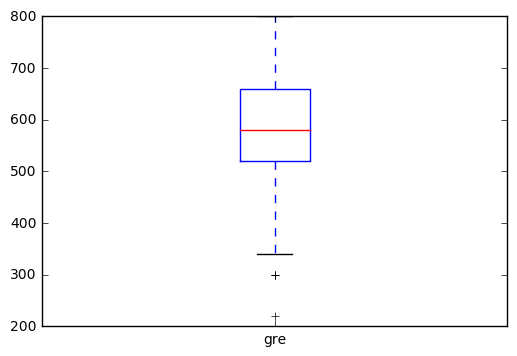

In [49]:
#boxplot 1
df.gre.plot(kind='box')

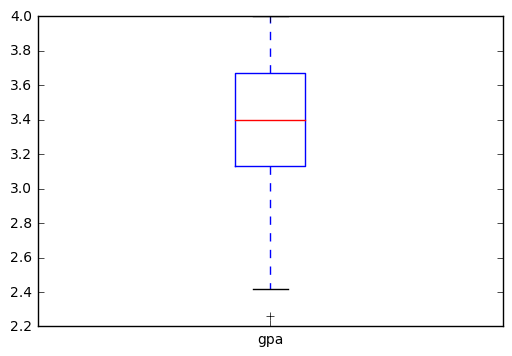

In [50]:
#boxplot 2 
df.gpa.plot(kind='box')

#### Question 7. What do this plots show?

Answer: The median of GRE is about 600. GRE score is distributed from about 330 to 800 with one suspected outlier about 300. The median of GPA is about 3.4. GPA is distributed from about 2.4 to 4.0 with no suspected outliers. There're no outliers for GRE and GPA.

#### Question 8. Describe each distribution 

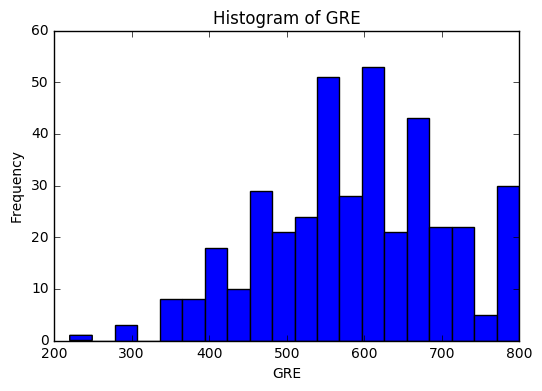

In [60]:
# plot the distribution of each variable 
df.gre.plot(kind='hist', bins=20, title='Histogram of GRE')
plt.xlabel('GRE')
plt.ylabel('Frequency')

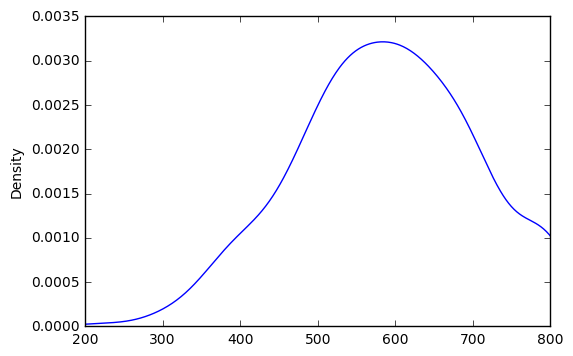

In [67]:
df.gre.plot(kind='density', xlim=(200, 800))

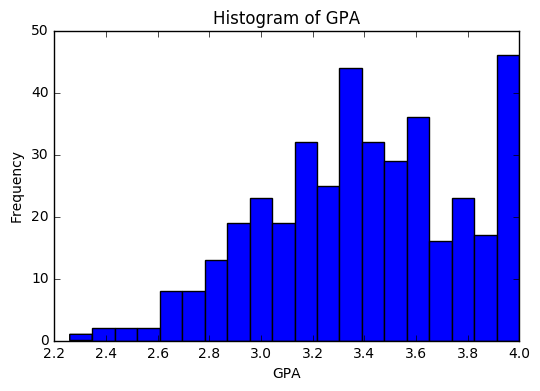

In [66]:
df.gpa.plot(kind='hist', bins=20, title='Histogram of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')

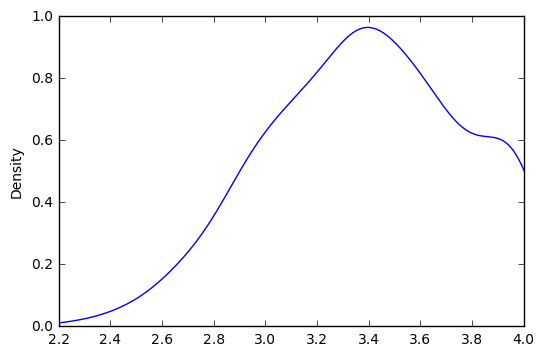

In [68]:
df.gpa.plot(kind='density', xlim=(2.2, 4.0))

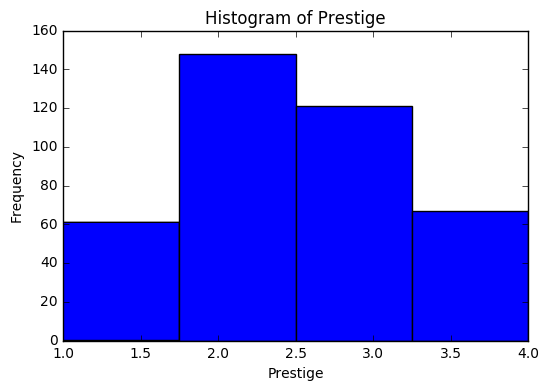

In [73]:
df.prestige.plot(kind='hist', bins=4, title='Histogram of Prestige')
plt.xlabel('Prestige')
plt.ylabel('Frequency')

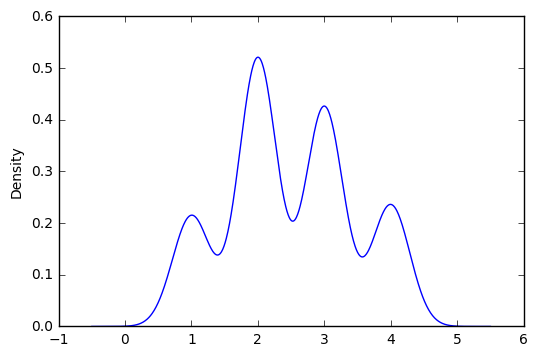

In [75]:
df.prestige.plot(kind='density')

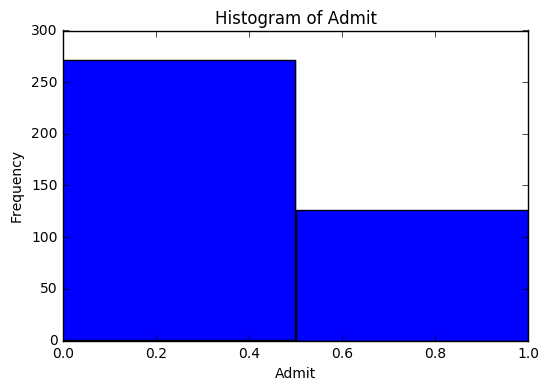

In [78]:
df.admit.plot(kind='hist',bins=2,title='Histogram of Admit')
plt.xlabel('Admit')
plt.ylabel('Frequency')

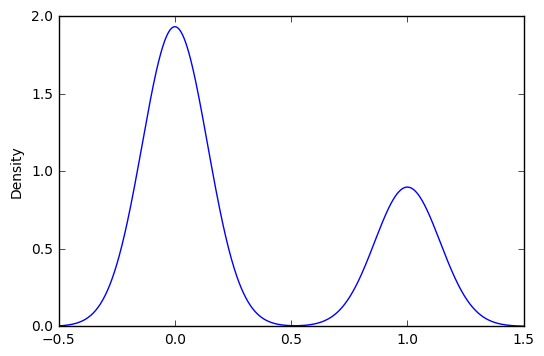

In [79]:
df.admit.plot(kind='density')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. None of the variables are normally distributed. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. According to the Central Limit Theorem, the sample mean of a distribution becomes approximately normal if the sample size is large enough. The distribution needs correction when we use a continuous function to approximate a discrete one. We can use the continuity correction factor to add or subtract. 

#### Question 11. Which of our variables are potentially colinear? 

In [80]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: There's a strong positive relationship between GRE and GPA. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: The plan is to run logistic regression on the 400 datasets provided by UCLA, using prestige of undergrad schools to predict admission into grad school. 

#### Question 14. What is your hypothesis? 

Answer: The hypothesis is prestige of undergrad schools may impact admission into grad school. The higher the prestige, the more likely a student will be admitted into grad school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data